<a href="https://colab.research.google.com/github/LucasDatilioCarderelli/Codenation/blob/master/Codenation/Projeto_Final/Prjct_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final Codenation

## Importing Files

In [1]:
#importando as bibliotecas mais básicas:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from zipfile import ZipFile
#para setar o número de linhas e colunas visíveis no dataset
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [112]:
zip_file = ZipFile("/content/estaticos_market.csv.zip")
dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
for text_file in zip_file.infolist() if text_file.filename.endswith('.csv')}
list(zip(dfs))

[('estaticos_market.csv',)]

In [3]:
mkt = pd.DataFrame(dfs['estaticos_market.csv'])

port1 = pd.read_csv("https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio1.csv")
port2 = pd.read_csv("https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio2.csv")
port3 = pd.read_csv("https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio3.csv")

mkt.shape, port1.shape, port2.shape, port3.shape

((462298, 182), (555, 182), (566, 2), (265, 2))

In [6]:
ints = mkt.select_dtypes(include=['int64','int32','int16']).columns
mkt[ints] = mkt[ints].apply(pd.to_numeric, downcast='integer')

floats = mkt.select_dtypes(include=['float']).columns
mkt[floats] = mkt[floats].apply(pd.to_numeric, downcast='float')

objects = mkt.select_dtypes('object').columns
mkt[objects] = mkt[objects].apply(lambda x: x.astype('category'))

mkt.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Columns: 182 entries, Unnamed: 0 to qt_filiais
dtypes: bool(9), category(27), float32(144), int16(1), int32(1)
memory usage: 348.4 MB


In [5]:
mkt.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,Fal

## Droping columns

In [7]:
mkt.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
for colunas in mkt.columns:
  if mkt[colunas].notna().sum() == 0:
    mkt.drop(colunas, axis=1, inplace=True)
    print(colunas)

qt_alteracao_socio_total
qt_alteracao_socio_90d
qt_alteracao_socio_180d
qt_alteracao_socio_365d
grau_instrucao_macro_desconhecido


In [57]:
for colunas in mkt.columns:
  if mkt[colunas].notna().sum() < (mkt.shape[0]*0.30):
    # mkt.drop(colunas, axis=1, inplace=True)
    print(colunas)

de_indicador_telefone
idade_media_coligadas
idade_maxima_coligadas
idade_minima_coligadas
coligada_mais_nova_ativa
coligada_mais_antiga_ativa
idade_media_coligadas_ativas
coligada_mais_nova_baixada
coligada_mais_antiga_baixada
idade_media_coligadas_baixadas
media_funcionarios_coligados_gp
max_funcionarios_coligados_gp
min_funcionarios_coligados_gp
faturamento_est_coligados
media_faturamento_est_coligados
max_faturamento_est_coligados
min_faturamento_est_coligados
faturamento_est_coligados_gp
media_faturamento_est_coligados_gp
max_faturamento_est_coligados_gp
min_faturamento_est_coligados_gp
total_filiais_coligados
media_filiais_coligados
max_filiais_coligados
min_filiais_coligados
sum_faturamento_estimado_coligadas
percent_func_genero_masc
percent_func_genero_fem
grau_instrucao_macro_analfabeto
grau_instrucao_macro_escolaridade_fundamental
grau_instrucao_macro_escolaridade_media
grau_instrucao_macro_escolaridade_superior
total
meses_ultima_contratacaco
media_meses_servicos_all
max_mese

In [ ]:
# mkt.nm_divisao.dropna()

In [56]:
mkt.notna().sum()

id                                               462298
fl_matriz                                        462298
de_natureza_juridica                             462298
sg_uf                                            462298
natureza_juridica_macro                          462298
de_ramo                                          462298
setor                                            460371
idade_empresa_anos                               462298
idade_emp_cat                                    462298
fl_me                                            462298
fl_sa                                            462298
fl_epp                                           462298
fl_mei                                           462298
fl_ltda                                          462298
dt_situacao                                      462292
fl_st_especial                                   462298
fl_email                                         462298
fl_telefone                                     

In [86]:
num_col = mkt.columns.str.contains("qt_|tx_|idade_d|idade_a|vl_")
for n in range(0, len(mkt.columns)):
  if num_col[n] == True:
    mkt.iloc[:,n].fillna(0, inplace=True)

In [108]:
mkt.select_dtypes(include="number").astype(dtype=int, errors="ignore")

,idade_empresa_anos,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,nu_meses_rescencia,vl_frota,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,14.457534,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,NaN,2.0,2.0,0.0,44.000000,47.0,41.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,6.0,6.0,0.0,0.0,0.0,0.0,220.477783,536.366638,57.299999,57.299999,536.366638,220.477783,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,1.0,5.0,0.0,0.0,1.0,5.0,0.0,145.0,145.0,36.250000,91.0,6.0,9375912.0,2.343978e+06,5275238.50,638798.375000,9375912.0,2343978.000,5275238.5,638798.375000,21809444.0,3.634907e+06,13188096.0,210000.000000,22019444.0,3669907.250,13188096.0,210000.000000,1.0,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,21809444.0,3.132173e+06,3.132173e+06,119.0,26.0,100.000000,0.000000,0.0,1.0,4.0,6.0,5.0,3.0,4.0,2.0,0.0,1.0,NaN,1.0,25.0,NaN,26.0,19.166666,0.0,0.0,119.0,145.0,13.309196,93.266670,-0.933333,43.738461,93.266670,19.166

In [105]:
 mkt.iloc[:,24]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
462293    0.0
462294    0.0
462295    0.0
462296    0.0
462297    0.0
Name: vl_total_tancagem, Length: 462298, dtype: float32

In [38]:
mkt.query("idade_empresa_anos < 1").idade_empresa_anos.round(0).astype("int16")

7         0
30        1
32        0
36        0
39        0
         ..
462239    1
462256    1
462274    0
462289    1
462297    1
Name: idade_empresa_anos, Length: 46780, dtype: int16

In [79]:
mkt.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Columns: 176 entries, id to qt_filiais
dtypes: bool(9), category(27), float32(139), int16(1)
memory usage: 337.8 MB


## Some Analysis

In [66]:
mkt.head(5)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,False,2005-03-25,False,True,True,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False,0.0,0.0,0.0,0.0,True,8.0,0.0,0.0,0.0,0

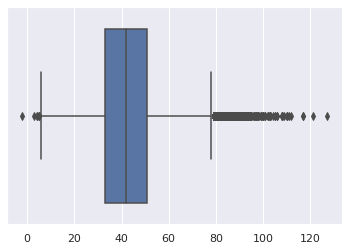

In [18]:
sns.boxplot(pd.DataFrame(mkt["idade_media_socios"].round(0)))

In [44]:
#how could it be posible?!
mkt.query(""" idade_media_socios > 58 & (idade_acima_de_58 < 1 | idade_acima_de_58 != idade_acima_de_58)
          """)["idade_media_socios"].round(0).value_counts().sum()

33885

In [ ]:
print(f"Isso equivale a {33885*100/mkt.shape[0]:.2f}%")

Isso equivale a 7.33%
